In [37]:
import importlib

import training
importlib.reload(training)
import graph_vis
importlib.reload(graph_vis)
import graph_creation
importlib.reload(graph_creation)
import utils
importlib.reload(utils)
import train_n2v
importlib.reload(train_n2v)

import os
import numpy as np

Using device: cpu
Random seed set to: 42
p_values: [1, 2]
q_values: [1, 2]


In [ ]:
def model_name_search(
    param_dict=None,
    model_dir="./training_data/models"
):
    """
    USED TO FIND BEST ACCURACY?
    Search for model files matching the given parameters in param_dict.
    Only parameters provided in param_dict will be used for filtering.
    Returns a list of matching filenames.
    """

    # Default values as used previously
    default_params = {
        "embedding_dim": 128,
        "walk_length": 70,
        "context_size": 14,
        "walks_per_node": 18,
        "num_negative_samples": 1,
        "sparse": True,
        "p": 1,
        "q": 2
    }

    if param_dict is None:
        param_dict = default_params
    else:
        pass
        # # Fill in missing defaults
        # for k, v in default_params.items():
        #     if k not in param_dict:
        #         param_dict[k] = v

    # Build the filter string(s) for each parameter provided
    filter_parts = []
    for key, value in param_dict.items():
        filter_parts.append(f"{key}_{value}")

    # List all files in the model directory
    if not os.path.exists(model_dir):
        return []

    matching_files = []
    for f in os.listdir(model_dir):
        if all(part in f for part in filter_parts):
            matching_files.append(f)
    return matching_files


files = model_name_search({'p': 1})
print(len(files))
print(files)


files = model_name_search({'p': 1, 'q': 2})
print(len(files))
print(files)

32
['node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.0741.json', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.0741.pth', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.0889.json', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.0889.pth', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.1111.json', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.1111.pth', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.1780.json', 'node2vec_embedding_dim_128_walk_

In [39]:
import os

# get dict
dicts_tests = training.create_parameters_dict()
dict_test = dicts_tests['p=1_q=2']
print(dict_test)

def get_best_acc_from_models(params: dict):
    string_of_params =  utils.file_name_generator(params)
    print(string_of_params)
# generate string for filename with 
    model_dir = "./training_data/models"
    matching_files = [f for f in os.listdir(model_dir) if string_of_params in f]
    print("list of matching files: ", matching_files)
    pass

get_best_acc_from_models(dict_test)

p_values: [1, 2]
q_values: [1, 2]
{'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 1, 'q': 2}
embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2
list of matching files:  ['node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.0741.json', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.0741.pth', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.0889.json', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.0889.pth', 'node2vec_embedding_dim_128_walk_length_70_context_size_14_walks_per_node_18_num_negative_samples_1_sparse_True_p_1_q_2_acc_0.1111.json',

In [40]:
# load cora 
dataset,data = training.load_dataset()
graph_vis.print_graph_info_cluster(data)
data_list=[data]

lol



----------Basic graph information-----------
Type:  <class 'networkx.classes.digraph.DiGraph'>
DiGraph with 2708 nodes and 10556 edges
Number of nodes:  2708
Number of edges:  10556
Average node degree:  7.796159527326441
Has isolated nodes:  0
Has self loops:  0
Is directed:  True
Error calculating Average Shortest Path (Largest Component): local variable 'largest_cc' referenced before assignment
Error calculating Number of Connected Components: not implemented for directed type
----------Graph extra statistics-----------
Number of connected components: N/A (directed graph)
Number of nodes in largest component: N/A (directed graph)
Average Clustering Coefficient: 0.24067329850193728
Transitivity/Global clustering coeff: 0.09349725626661058



Running with 1 = {'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 2, 'q': 1}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 10 epochs...


Epoch 1/10 Training:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch: 001, Loss: 7.8224, Acc: 0.1840, Duration: 311.94s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.1840


Epoch: 002, Loss: 5.2763, Acc: 0.2340, Duration: 141.61s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.2340


Epoch: 003, Loss: 3.8223, Acc: 0.3070, Duration: 146.69s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.3070


Epoch: 004, Loss: 2.8675, Acc: 0.3760, Duration: 152.44s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.3760


Epoch: 005, Loss: 2.2448, Acc: 0.4330, Duration: 138.98s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.4330


Epoch: 006, Loss: 1.8308, Acc: 0.4690, Duration: 130.77s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.4690


Epoch: 007, Loss: 1.5490, Acc: 0.5040, Duration: 137.00s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.5040


Epoch: 008, Loss: 1.3587, Acc: 0.5490, Duration: 136.73s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.5490


Epoch: 009, Loss: 1.2263, Acc: 0.5790, Duration: 137.02s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.5790


Epoch: 010, Loss: 1.1397, Acc: 0.5900, Duration: 129.61s
Dataset name: load_dataset_Cora
    New best model saved with accuracy: 0.5900

Training finished.
Total elapsed time: 1562.91 seconds
Best test accuracy: 0.5900
Best model state saved to './training_data/models/'


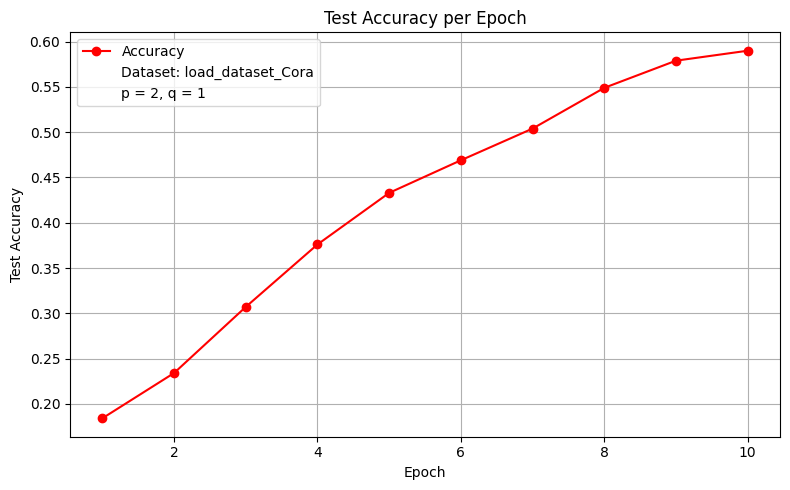

In [41]:
# actually just load best model, i will train later - how to track the best?
# p>q case is the winner
parameter_dicts = {1:{"embedding_dim": 128,
                        "walk_length": 70,
                        "context_size": 14,
                        "walks_per_node": 18,
                        "num_negative_samples": 1,
                        "sparse": True,
                        "p": 2,
                        "q": 1,
                          }
}

train_n2v.train_node2vec(data_list, parameter_dicts = parameter_dicts ,  num_training_epochs = 10)

## mostani saving hogyan működik
model_training_n2v - minden epochban lementi ha jobb mint az előző. params a formátum, szóval minden parameterszettel egy modell lesz lementve
issue: nem tudjuk melyik a jó score
params_to_string formában megy

temp megoldás: acc legyen a modell nevében xd
1. kerüljön bele mikor mentünk
2. when saving check prev best with same params

longterm: wieghts and biases or sg like that


In [42]:
#create GS embeddings (first get a good model on it and save it)

In [43]:
# get the two embeddings

In [44]:
# on given embeddings compare ml classifiers